# Métodos preditivos de Machine Learning

<img src='https://cms.qz.com/wp-content/uploads/2018/04/random-forest-animated-final-2.gif?w=410&h=270&strip=all&quality=75'/>

## Introdução

Classificação e regressão são tarefas de aprendizagem supervisionada, **onde objetiva-se aprender um padrão de relação entre entrada e a saída**. 
- A  classificação é mais apropriada ao se trabalhar com saídas discretas (*e.g.*, ''sim'' ou ''não'');
- A regressão, por outro lado, é indicada para problemas com saídas contínuas como um valor real, por exemplo.

Tarefas de **agrupamento e associação** são consideradas pertencentes à aprendizagem não-supervisionada, ou seja, quando não há instâncias rotuladas na coleção.
- Técnicas de agrupamento tentam identificar *clusters* com base nos atributos e/ou características dos dados;
- Métodos de associação são projetados para identificar regras associativas entre as amostras como, por exemplo, ''*celulares mais vendidos com sistema operacional X*''.

Neste módulo iremos estudar alguns métodos clássicos de *machine learning* pertencentes à <mark>aprendizagem supervisionada</mark>. Iremos focar, principalmente em técnias de classificação, abordando rapidamente a parte teórica a fim de proporcionar uma melhor explanação prática.

### O que iremos ver?


- Métodos
 - KNN *(from scratch)*
 - Naive Bayes *(using SkLearn)*
 - Árvores *(using SkLearn)*
- Métricas & Avaliação de modelos

In [103]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Iremos trabalhar com a coleção `jurassic.csv`. Vamos, então, deixar tudo prontinho...

In [2]:
df_jurassic = pd.read_csv("jurassic.csv")
df_jurassic

,Animal,Era,Dentes,Número de Asas,Penas Simétricas,Ave
0,Yi qi,Jurassic,V,4,F,F
1,Jianianhualong tengi,Cretaceous,V,2,F,F
2,Microraptor gui,Cretaceous,V,4,F,F
3,Archaeopteryx lithographica,Jurassic,V,2,F,V
4,Tongtianlong limosus,Cretaceous,F,2,V,F
5,Serikornis sungei,Jurassic,V,4,V,F
6,Confuciusornis sanctus,Cretaceous,F,2,F,V
7,Anchiornis huxleyi,Jurassic,V,4,F,V


Não iremos precisar da coluna `Animal`, dessa forma, podemos remover do DataFrame com o método `pd.drop()`:

In [3]:
df_jurassic.drop(['Animal'], axis=1, inplace=True)
df_jurassic

,Era,Dentes,Número de Asas,Penas Simétricas,Ave
0,Jurassic,V,4,F,F
1,Cretaceous,V,2,F,F
2,Cretaceous,V,4,F,F
3,Jurassic,V,2,F,V
4,Cretaceous,F,2,V,F
5,Jurassic,V,4,V,F
6,Cretaceous,F,2,F,V
7,Jurassic,V,4,F,V


## K Nearest Neighbors (K-NN)

O KNN é um método baseado em **instâncias**! Esses métodos são muito simples e baseam-se na ideia de encontrar um conjunto pré-definido de casos de treino similares a uma nova instância (os vizinhos) e prever a nova instância com base neles.

O tamanho da vizinhança pode ser tanto dada em termos de um número fixo $k$ quanto em termos de um raio de distância. A distância pode ser medida por qualquer métrica, por exemplo, a euclidiana. **Estes métodos não empregam técnicas de generalização já que eles lembram de todos os dados do treino.** 

> Dada a coleção `df_jurassic`, qual a classe da instância `{Era='Cretaceous', Dentes='V', Número de Asas=2, Penas Simétricas='V'}`, considerando $k$ = 1, 3, 5?

Para isso, vamos utilizar a distância euclidiana:


<img src='https://i1.wp.com/dataaspirant.com/wp-content/uploads/2015/04/euclidean.png' width='400'/>

Ouuu...

$$
dist(a, b) = \sqrt{ \sum_{i=0}^{n}{d_i^2}  },\\
d_i =\begin{cases}
    0, & \text{se $a_i \notin \mathbb{R}$ e $a_i = b_i$}. \\
    1, & \text{se $a_i \notin \mathbb{R}$ e $a_i \neq b_i$}. \\
    a_i - b_i, & \text{caso contrário}.
 \end{cases}
$$

Neste caso, estamos assumindo que **a distância entre atributos simbólicos é 0** se eles têm os mesmos valores e 1, caso contrário. Convertendo para Python, temos:



In [4]:
def dist(a, b):
    # Esta função irá ser executada para cada exemplo da coleção, linha por linha
    summ = 0
    
    for i in range(len(a)): # Para cada atributo da linha, faça:
        if isinstance(a[i], str): # Se o atributo for string...
            val = 0 if a[i] == b[i] else 1 # `val` recebe 0 caso o atributo da coleção seja igual ao da instância ou 0, caso contrário.
        else: # Caso o atributo não seja string, então apenas calcula a diferença
            val = int(a[i]) - int(b[i])
        
        # Independente das condições acima, calcula o quadrado de `val`
        # e acrescenta `val` ao acumulador/somatório `summ`
        summ += val**2
        
    return np.sqrt(summ) # Retorna a raiz quadrada do somatório `summ`

Vamo testar?

Precisamos converter nossa instância (`{Era='Cretaceous', Dentes='V', Número de Asas=2, Penas Simétricas='V'}`) para um formato mais acessível à função `dist`, criada acima. Logo, trabalharemos com formatos de vetores do Numpy. 

Como resultado, temos:

In [5]:
instancia = np.array(['Cretaceous', 'V', 2, 'V']) # Era, Dentes, Número de Asas, Penas Simétricas

Show! Agora, basta aplicar a função `dist` para cada linha da nossa coleção `df_jurassic`, MAAASS, para testar, vamos passar apenas uma linha. Podemos usar `pd.iloc[]` para obter uma linha associada a um índice.

In [6]:
df_jurassic.iloc[0]

Era                 Jurassic
Dentes                     V
Número de Asas             4
Penas Simétricas           F
Ave                        F
Name: 0, dtype: object

Perceba que o atributo `Ave` é o nosso alvo. Logo, não iremos passar ele. Devemos, então, mantermos apenas os mesmos atributos da instância (Era, Dentes, Número de Asas, Penas Simétricas):

In [7]:
df_jurassic.iloc[0][:-1]

Era                 Jurassic
Dentes                     V
Número de Asas             4
Penas Simétricas           F
Name: 0, dtype: object

Aaah, só pra fins de visualização, podemos deixar a saída do `pd.iloc` em um formato Numpy (pra ficar mais fácil de ver/comparar com a nossa instância):

In [8]:
np.array(df_jurassic.iloc[0][:-1])

array(['Jurassic', 'V', 4, 'F'], dtype=object)

In [9]:
instancia

array(['Cretaceous', 'V', '2', 'V'], dtype='<U10')

Podemos aplicar `dist` entre esses vetores para identificarmos a distância euclediana entre eles:

In [10]:
dist(df_jurassic.iloc[0][:-1], instancia)

# Perceba que passar o `pd.iloc` no formato Numpy é SUPEEEER opcional

2.449489742783178

Veja que calculamos nossa distância apenas para um exemplo da coleção... e deu um valorzinho bem alto rs

Vamos agora calcular para TODAA a coleção `df_jurassic`? Neste caso, podemos usar (cautelosamente) o `pd.apply`  para passar cada linha à função `dist`.

PS: `row` terá armazenará um `pd.Series`, bem parecido com o retorno do comando `pd.iloc`. Logo, devemos continuar pasando `[:-1]` para mantermos todos os atributos, exceto o último, `Ave`, que é o nosso alvo.

In [11]:
eucledian_dist = df_jurassic.apply(lambda row: dist(row[:-1], instancia), axis=1)
eucledian_dist

0    2.449490
1    1.000000
2    2.236068
3    1.414214
4    1.000000
5    2.236068
6    1.414214
7    2.449490
dtype: float64

Vamos juntar `eucledian_dist` ao DataFrame para termos uma visualização melhor?

In [12]:
df_jurassic['distance'] = eucledian_dist
df_jurassic

,Era,Dentes,Número de Asas,Penas Simétricas,Ave,distance
0,Jurassic,V,4,F,F,2.449490
1,Cretaceous,V,2,F,F,1.000000
2,Cretaceous,V,4,F,F,2.236068
3,Jurassic,V,2,F,V,1.414214
4,Cretaceous,F,2,V,F,1.000000
5,Jurassic,V,4,V,F,2.236068
6,Cretaceous,F,2,F,V,1.414214
7,Jurassic,V,4,F,V,2.449490


Podemos também ordenar a coleção pelo valor da dinstância:

In [13]:
df_jurassic.sort_values('distance', ascending=True)

,Era,Dentes,Número de Asas,Penas Simétricas,Ave,distance
1,Cretaceous,V,2,F,F,1.000000
4,Cretaceous,F,2,V,F,1.000000
3,Jurassic,V,2,F,V,1.414214
6,Cretaceous,F,2,F,V,1.414214
2,Cretaceous,V,4,F,F,2.236068
5,Jurassic,V,4,V,F,2.236068
0,Jurassic,V,4,F,F,2.449490
7,Jurassic,V,4,F,V,2.449490


Se quisermos obter os $K$ vizinhos mais próximos da nossa instância (`{Era='Cretaceous', Dentes='V', Número de Asas=2, Penas Simétricas='V'}`), basta selecionar as $K$ linhas do nosso DataFrame com a menor distância euclediana calculada. Por exemplo:

In [28]:
df_jurassic.sort_values('distance', ascending=True).head(3)

,Era,Dentes,Número de Asas,Penas Simétricas,Ave,distance
1,Cretaceous,V,2,F,F,1.000000
4,Cretaceous,F,2,V,F,1.000000
3,Jurassic,V,2,F,V,1.414214


Podemos dizer que nossa instância, provalvemente, é da classe `{Ave='F'}`, uma vez que os indivíduos mais próximos a ela são também dessa classe.

### Usando a implementação do KNN do Scikit-Learn:

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

Vamos copiar nossa coleção original `df_jurassic` para um novo DataFrame chamdo `df_train`:

In [16]:
df_train = df_jurassic.iloc[:, :-1].copy()
df_train

,Era,Dentes,Número de Asas,Penas Simétricas,Ave
0,Jurassic,V,4,F,F
1,Cretaceous,V,2,F,F
2,Cretaceous,V,4,F,F
3,Jurassic,V,2,F,V
4,Cretaceous,F,2,V,F
5,Jurassic,V,4,V,F
6,Cretaceous,F,2,F,V
7,Jurassic,V,4,F,V


Para usarmos o Scikit-Learn, devemos fazer alguns pequenos ajustes na nossa coleção. Primeiramente, iremos nos atentar aos tipos dos dados, visto que o SkLearn não é compatível com o formato `String`.

Assim, utilizaremos a classe `LabelEncoder` para nos ajudar a codificar e decodificar os valores compatíveis com os modelos disponíveis no Scikit-Learn.

In [17]:
le = {}

for column in df_train.columns: # Para cada coluna do DataFrame
    enc = LabelEncoder() # Instâncie um novo objeto LabelEncoder
    df_train[column] = enc.fit_transform(df_train[column].astype(str)) # Codifique os valores dessa coluna
    le[column] = enc # Salve o objeto numa tabela hash/dicionário cuja a chave seja o mesmo nome da coluna
    
df_train

,Era,Dentes,Número de Asas,Penas Simétricas,Ave
0,1,1,1,0,0
1,0,1,0,0,0
2,0,1,1,0,0
3,1,1,0,0,1
4,0,0,0,1,0
5,1,1,1,1,0
6,0,0,0,0,1
7,1,1,1,0,1


Podemos acessar o encoder de cada coluna, em `le`, e verificar as classes codificadas:

In [18]:
le['Era'].classes_

array(['Cretaceous', 'Jurassic'], dtype=object)

Agora, vamos deixar os atributos de treino explicitamente separados dos seus respectivos alvos:

In [19]:
X = df_train.iloc[:, :-1] # Obtém todos os atributos, exceto a coluna "Ave"
y = df_train['Ave'] # Seleciona apenas a coluna "Ave"

Podemos ''treinar'' o KNN, com parêmetros próximos do que utilizamos na nossa implementação:

In [20]:
neigh = KNeighborsClassifier(n_neighbors=3, p=2)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Agora, podemos usar o método `KNeighborsClassifier.predict()` para inferirmos o alvo numa instância de teste.

Aaah, lembra, que já temos uma instância \o/ (`{Era='Cretaceous', Dentes='V', Número de Asas=2, Penas Simétricas='V'}`)... Ela está já no formato de arrays do Numpy na variável `instancia`:

In [21]:
instancia

array(['Cretaceous', 'V', '2', 'V'], dtype='<U10')

Para testarmos o nosso modelo do SkLearn, temos que aplicar o objeto `LabelEncoder` de cada coluna (que criamos mais cedo e armazenamos num dicionário) aos atributos da nossa instância.

In [22]:
test = np.full(len(instancia), np.nan, dtype=int)

test[0] = le['Era'].transform([instancia[0]])[0]
test[1] = le['Dentes'].transform([instancia[1]])[0]
test[2] = le['Número de Asas'].transform([instancia[2]])[0]
test[3] = le['Penas Simétricas'].transform([instancia[3]])[0]

test

array([0, 1, 0, 1])

Para obtermos o alvo, basta utilizarmos o método `predict`...

In [23]:
y_pred = neigh.predict([test])
y_pred

array([0])

Ele irá nos devolver um `ŷ` que é um valor relacionado ao atributo `Ave`. Esse *output* é a previsão final do modelo, mas desse jeito ele está codificado. Podemos usar o encoder de Ave para verificarmos se nossa instância é ave ou não:

In [24]:
le['Ave'].inverse_transform(y_pred)

array(['F'], dtype=object)

In [25]:
dist, indexes = neigh.kneighbors([test])

print("Distâncias:", dist)
print("Índices", indexes)

Distâncias: [[1.         1.         1.41421356]]
Índices [[4 1 2]]


Podemos até mesmo localizar os vizinhos mais próximos a nossa instância de teste:

In [26]:
X.loc[indexes[0]]

,Era,Dentes,Número de Asas,Penas Simétricas
4,0,0,0,1
1,0,1,0,0
2,0,1,1,0


Mas lembra que ainda tá codificado =/

Vamos deixar legível :)

In [27]:
temp = X.loc[indexes[0]].copy()

temp['Ave'] = y[indexes[0]]

for col in temp.columns:
    temp[col] = le[col].inverse_transform(temp[col])
    
temp['dist'] = dist[0]

temp

,Era,Dentes,Número de Asas,Penas Simétricas,Ave,dist
4,Cretaceous,F,2,V,F,1.000000
1,Cretaceous,V,2,F,F,1.000000
2,Cretaceous,V,4,F,F,1.414214


## Explorando novos métodos! =D

Bem, agora que você já está familiarizado um pouquinho com a parte mais teórica/prática de machine learning, incluindo o Sk-Learn, vamos explorar alguns novos métodos?

É bem importante conhecermos os principais tipos de modelos disponíveis lá... Bem como avaliarmos esses métodos. Vamos focar nisso comparando implementações de árvores de decisão e outras técnicas =D

Assim, iremos utilizar a base pública [Titanic](https://www.kaggle.com/c/titanic/data), que já está no nosso repositório (`titanic.csv`)

In [171]:
df_titanic = pd.read_csv("titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sobre os atributos:


- `PassengerId`: Unique ID of the passenger
- `Survived`: Survived (1) or died (0)
- `Pclass`: Passenger's class (1st, 2nd, or 3rd)
- `Name`: Passenger's name
- `Sex`: Passenger's sex
- `Age`: Passenger's age
- `SibSp`: Number of siblings/spouses aboard the Titanic
- `Parch`: Number of parents/children aboard the Titanic
- `Ticket`: Ticket number
- `Fare`: Fare paid for ticket
- `Cabin`: Cabin number
- `Embarked`: Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

Perceba que a base contém vários tipos de dados (inteiros, reais, strings)... Vamos precisar fazer uma leve limpeza.

In [172]:
df_titanic.shape

(1309, 12)

In [173]:
df_titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [174]:
# -- Vamos excluir algumas colunas e também as linhas que não contém valores

df_titanic.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
df_titanic.dropna(inplace=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0.0,3,male,22.0,1,0,S
1,2,1.0,1,female,38.0,1,0,C
2,3,1.0,3,female,26.0,0,0,S
3,4,1.0,1,female,35.0,1,0,S
4,5,0.0,3,male,35.0,0,0,S


Como ficou:

In [175]:
df_titanic.shape

(712, 8)

In [176]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

Agora, vamos tentar consertar os tipos... Podemos usar o `LabelEncoder` ou o tipo `Category`, do próprio pandas.

In [178]:
le = {}

for column in df_titanic.select_dtypes('object').columns:
    print("Codificando coluna `%s`..." % column)
    
    enc = LabelEncoder()
    
    df_titanic[column] = enc.fit_transform(df_titanic[column])
    le[column] = enc

Codificando coluna `Sex`...
Codificando coluna `Embarked`...


In [179]:
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0.0,3,1,22.0,1,0,2
1,2,1.0,1,0,38.0,1,0,0
2,3,1.0,3,0,26.0,0,0,2
3,4,1.0,1,0,35.0,1,0,2
4,5,0.0,3,1,35.0,0,0,2


Vamos plotar alguns gráficos? =D

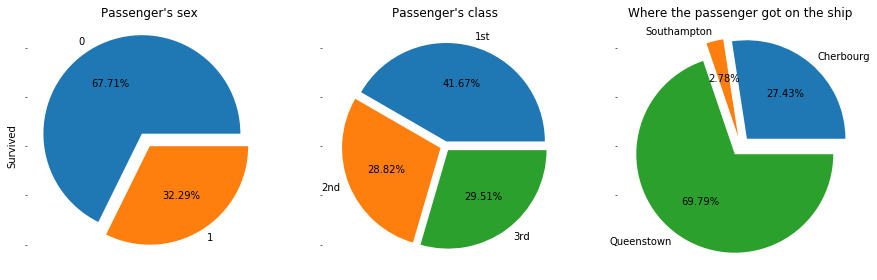

In [180]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)


ax[0].set_title("Passenger's sex")
df_titanic['Survived'].groupby(df_titanic['Sex']).sum().plot(kind='pie', explode=(0.15, 0), 
                                                             autopct="%.2f%%", ax=ax[0])

ax[1].set_title("Passenger's class")
df_titanic['Survived'].groupby(df_titanic['Pclass']).sum().plot(kind='pie', autopct="%.2f%%", 
                                                                labels=['1st', '2nd', '3rd'],
                                                                explode=(.05, .05, .05),
                                                                ax=ax[1])
ax[2].set_title("Where the passenger got on the ship")
df_titanic['Survived'].groupby(df_titanic['Embarked']).sum().plot(kind='pie', autopct="%.2f%%", 
                                                                labels=['Cherbourg', 'Southampton', 'Queenstown'],
                                                                explode=(.1, .1, .1), ax=ax[2])

Agora que já temos os dados tratadinhos, podemos começar a explorar os métodos de ML. Existem várias técnicas disponíveis, [neste link](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) você pode conferir um *cheat-sheet* do próprio SkLearn.

<img src='https://scikit-learn.org/stable/_static/ml_map.png' width='1024'/>

Nesta aula, iremos comparar a performance de três modelos para o problema do Titanic.

- Redes Neurais (rasas);
- Árvore de decisão; e
- Florestas Aleatórias.

Lembre-se que o SkLearn, precisa que digamos quem são os atributos de treino ($X$) e o alvo ($y$) de forma explícita. Em tarefas de classificação precisaremos ter conjuntos de treino e teste (com seus respectivos alvos separados): 

- Treino: $X\_train$, $y\_train$
- Teste: $X\_test$, $y\_test$

Para nos ajudar a criar esses subconjuntos a partir da coleção `df_titanic`, usaremos o método [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [181]:
from sklearn.model_selection import train_test_split


X = df_titanic.drop(["PassengerId", "Survived"], axis=1)
y = df_titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [182]:
X.shape, X_train.shape, X_test.shape

((712, 6), (477, 6), (235, 6))

Utilizaremos esses conjuntos para treinar ($X\_train$, $y\_train$) e testar ($X\_test$, $y\_test$) nossos modelos. A partir dos testes, poderemos observar a performance das técnicas e entender qual a que melhor se adequa ao nosso problema.


#### Redes Neurais

<center>
    <table>
        <tr>
            <td><img src='https://camo.githubusercontent.com/8b87e593fb9382c16a81cc059d994adec259a1c4/687474703a2f2f692e696d6775722e636f6d2f643654374b39332e706e67' width='500'/></td>            
            <td><img src='https://res.cloudinary.com/practicaldev/image/fetch/s--5DxkKcR3--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/800/0%2AUHkKkn4dcN45xbAc.png' width='500'/></td>
        </tr>
    </table>
</center>

In [188]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(4, 3), activation='logistic', max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Sua vez! Treine, teste e avalie...

- Árvore de Decisão (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- Florestas Aleatórias (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)